In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# READING DATA

In [2]:
df = pd.read_csv("../input/lung-cancer/survey lung cancer.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


# DATA EXPLORATION

In [3]:
df.info()
df.dtypes
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

GENDER                    2
AGE                      39
SMOKING                   2
YELLOW_FINGERS            2
ANXIETY                   2
PEER_PRESSURE             2
CHRONIC DISEASE           2
FATIGUE                   2
ALLERGY                   2
WHEEZING                  2
ALCOHOL CONSUMING         2
COUGHING                  2
SHORTNESS OF BREATH       2
SWALLOWING DIFFICULTY     2
CHEST PAIN                2
LUNG_CANCER               2
dtype: int64

In [4]:
#Check detailed info
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


**Checking for NULL Values in the dataset**

In [5]:
#Check detailed info
df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

# DATA CLEANING
**Dropping irrelevant columns**

In [6]:
df.drop(['ANXIETY','YELLOW_FINGERS','PEER_PRESSURE'], axis=1,inplace=True)
df.head()

,GENDER,AGE,SMOKING,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,1,1,1,2,1,2,2,1,1,NO


# DATA VISUALIZATION

**GENDER - BASED CROSSTAB ANALYSIS**

In [7]:

columns = ['LUNG_CANCER', 'ALCOHOL CONSUMING', 'SMOKING']

for column in columns:
    p1_sex1 = df['GENDER'].value_counts()
    p1_sex2 = pd.crosstab(df['GENDER'], df[column])
    print(p1_sex2)


LUNG_CANCER  NO  YES
GENDER              
F            22  125
M            17  145
ALCOHOL CONSUMING    1    2
GENDER                     
F                  100   47
M                   37  125
SMOKING   1   2
GENDER         
F        67  80
M        68  94


**BAR Plot depicting Average Age by Health Factors in Lung Cancer Patients**

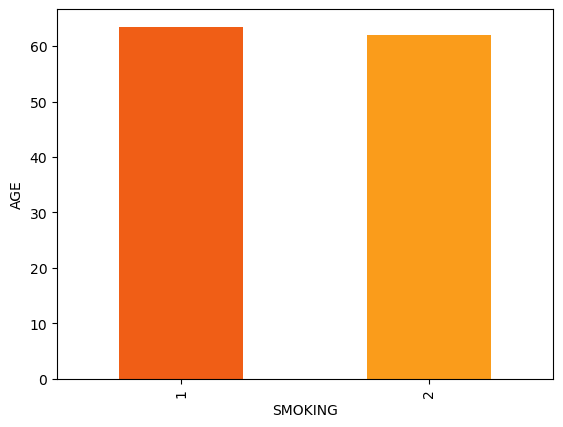

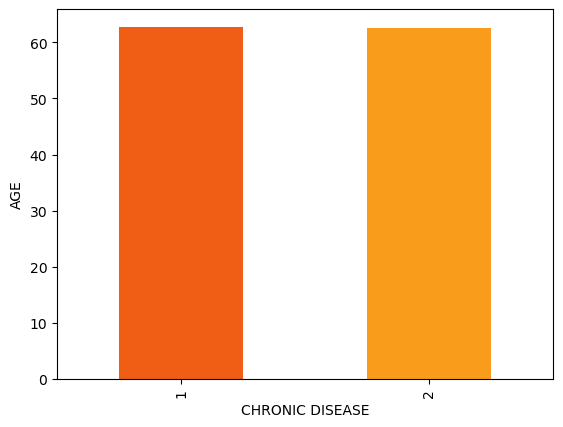

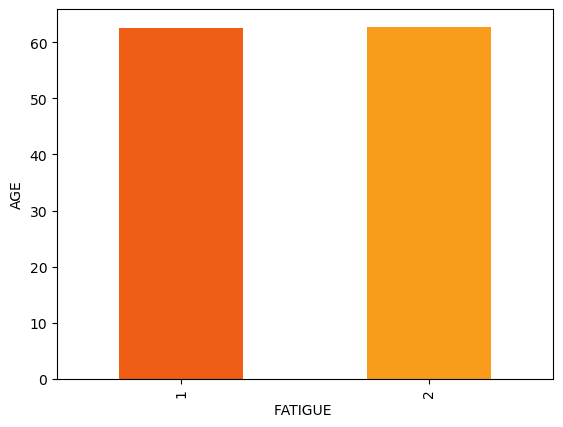

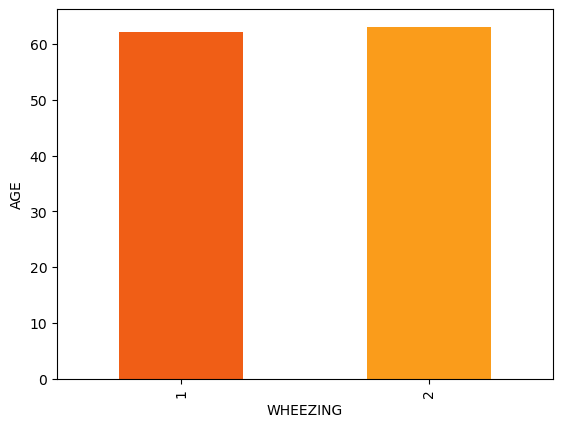

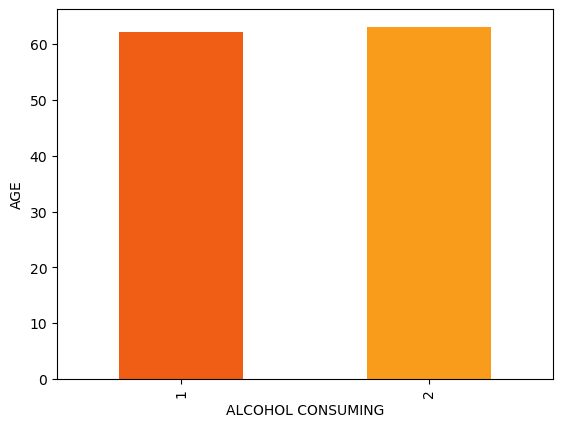

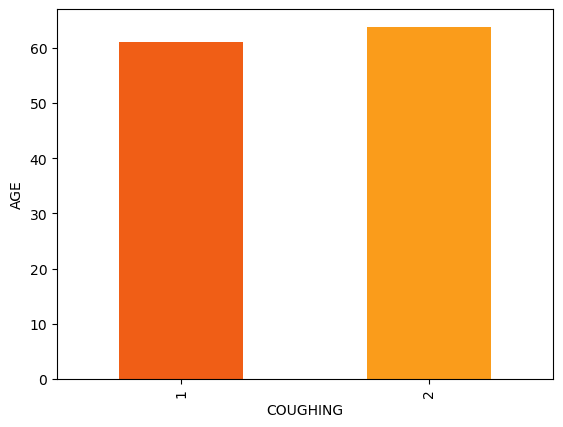

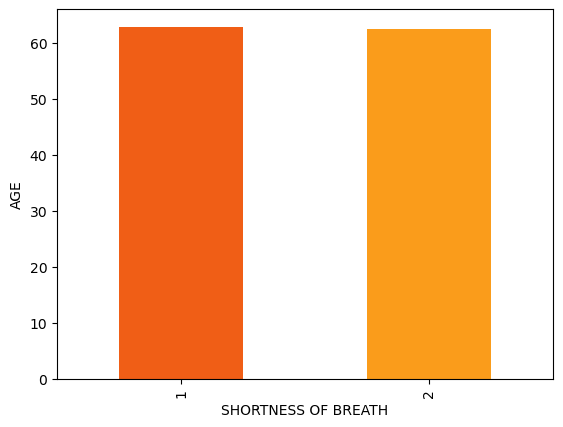

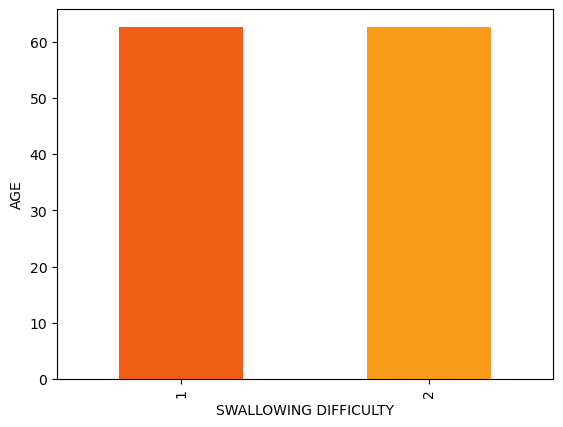

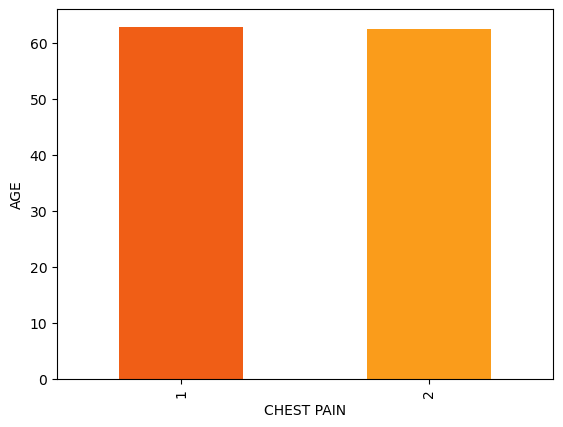

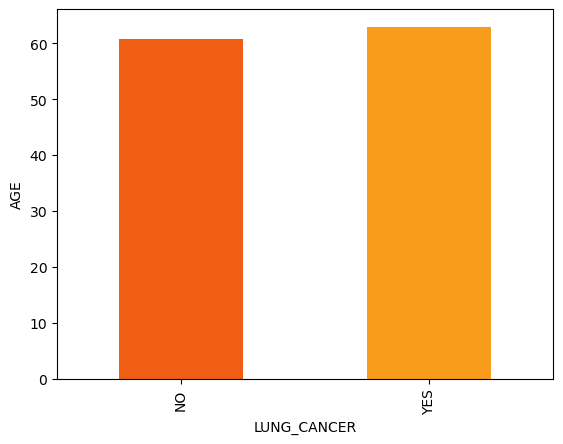

In [8]:
names = ['SMOKING', 'CHRONIC DISEASE', 'FATIGUE ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']

bar_colors = ['#F05E16', '#FA9C1B']  

for i in names:
    df.groupby(i)['AGE'].mean().plot.bar(color=bar_colors)
    plt.xlabel(i)
    plt.ylabel('AGE')
    plt.show()

**Pie Charts of Binary Variables Distribution**

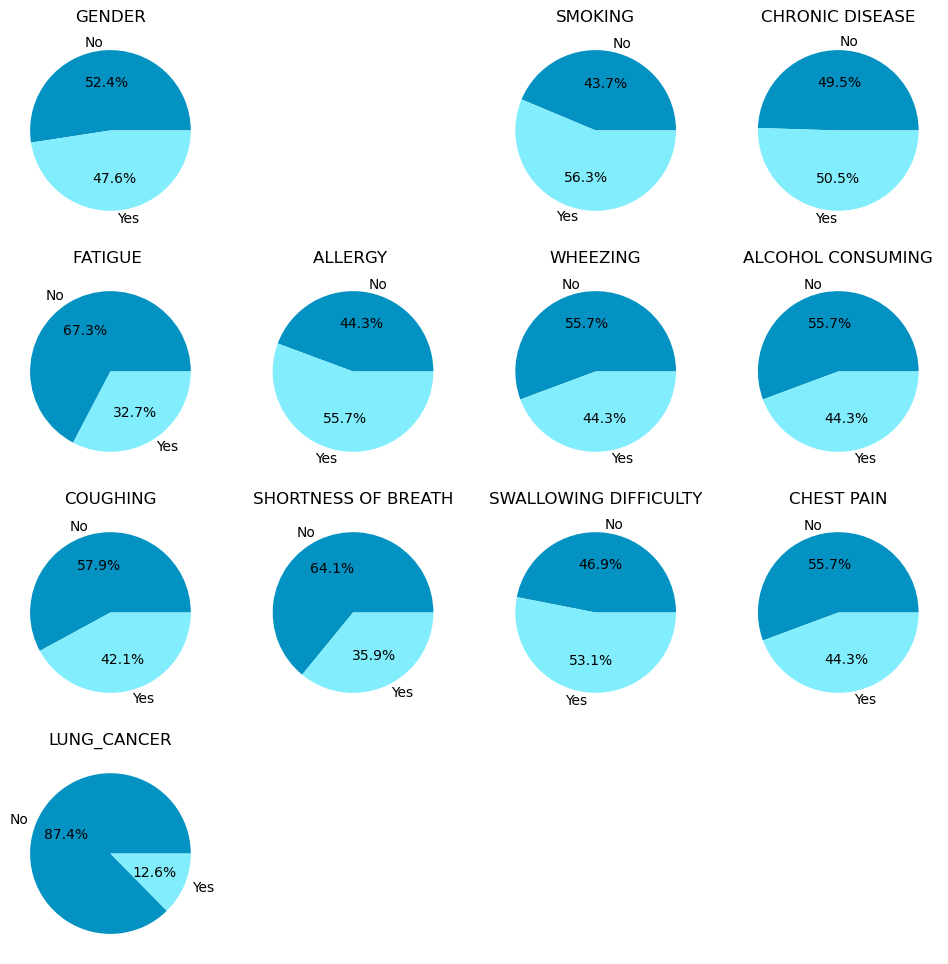

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
colors = ['#0492C2', '#82EEFD']

for i in range(0, len(df.columns)):
    if i == 1:
        continue
    else:
        plt.subplot(4, 4, i+1)
        plt.title("{0}".format(df.columns[i]))
        plt.pie(df.iloc[:, i].value_counts(sort=False), labels=['No', 'Yes'], autopct='%.1f%%', colors=colors)

plt.show()


Text(0, 0.5, 'LUNG CANCER')

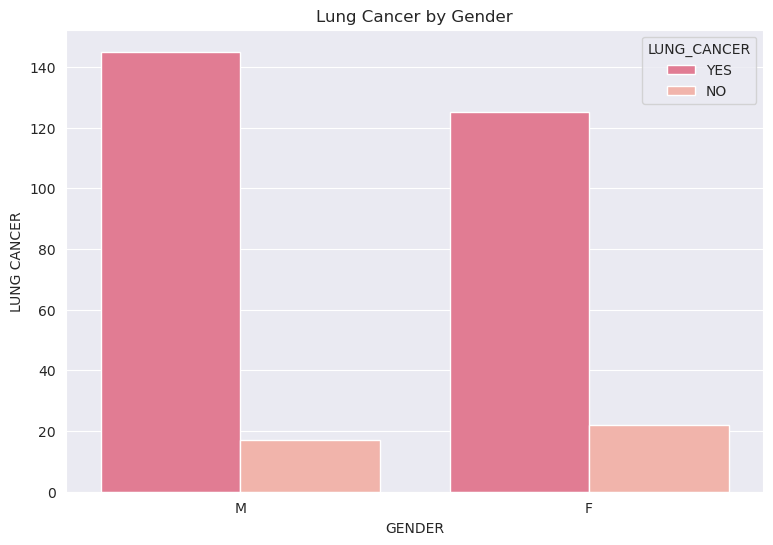

In [10]:

# BARPLOT FOR LUNG CANCER BY GENDER
plt.figure(figsize=(9,6))
sns.set_style('darkgrid')
sns.countplot(data = df,x = "GENDER", hue="LUNG_CANCER",palette=["#F26B8A", "#FDAB9F"])
plt.title("Lung Cancer by Gender")
plt.xlabel("GENDER")
plt.ylabel("LUNG CANCER")                 

Average Age With 62.67313915857605
Average Age Without 62.67313915857605


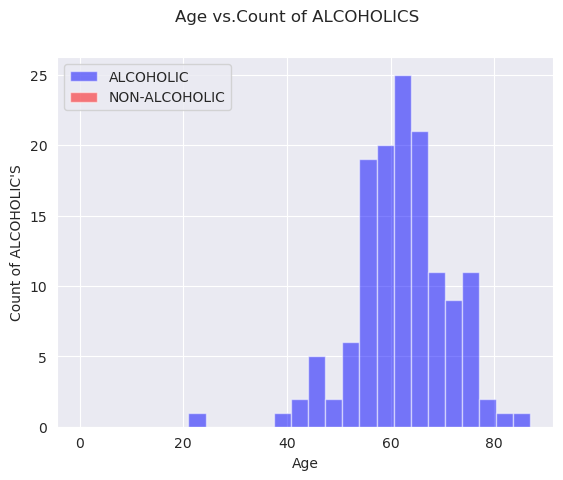

In [11]:
# MULTIPLE DENSITY ESTIMATE PLOT TO DETECT THE COUNT OF SMOKERS BY THEIR AGE

#1
fig, ax = plt.subplots()
ax.hist(df[df["ALCOHOL CONSUMING"]==1]["AGE"], bins=20, alpha=0.5, color="blue", label="ALCOHOLIC")
ax.hist(df[df["ALCOHOL CONSUMING"]==0]["AGE"], bins=20, alpha=0.5, color="RED", label="NON-ALCOHOLIC")
ax.set_xlabel("Age")
ax.set_ylabel("Count of ALCOHOLIC'S")
fig.suptitle("Age vs.Count of ALCOHOLICS")
ax.legend()
print("Average Age With", df['AGE'].mean())
print("Average Age Without", df['AGE'].mean())


<Axes: xlabel='AGE', ylabel='Count'>

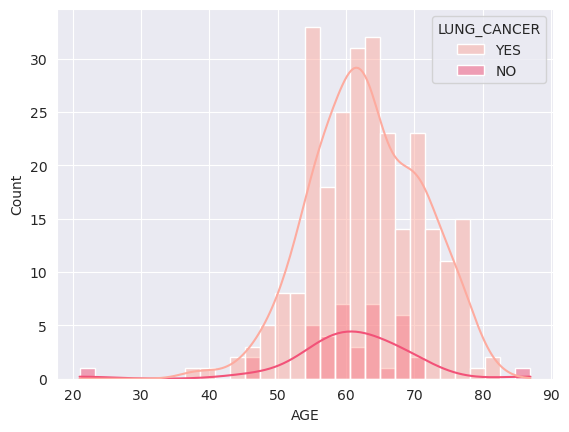

In [12]:
#HISTOGRAM FOR ALCOHOL AND SMOKING BY GENDER & AGE
sns.histplot(data=df, x='AGE', bins= 30, color="red", kde=True, hue='LUNG_CANCER',palette=["#FDAB9F", "#F25278"])

<Axes: xlabel='AGE', ylabel='Count'>

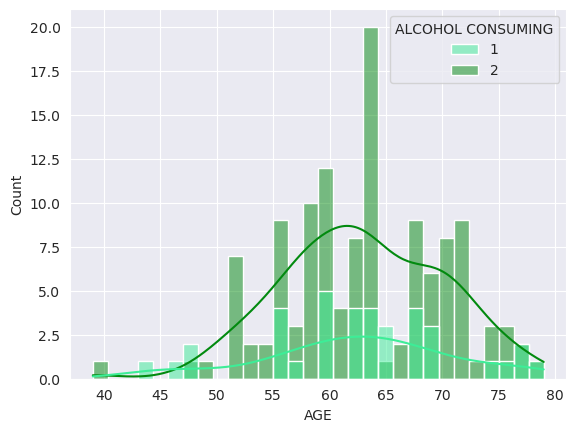

In [13]:
#Age Distribution of Male Individuals by Alcohol Consumption
sns.histplot(data=df[df['GENDER']=="M"], x='AGE', bins= 30, kde=True, hue='ALCOHOL CONSUMING', palette=["#3DED97", "#028A0F"])

<Axes: xlabel='AGE', ylabel='Count'>

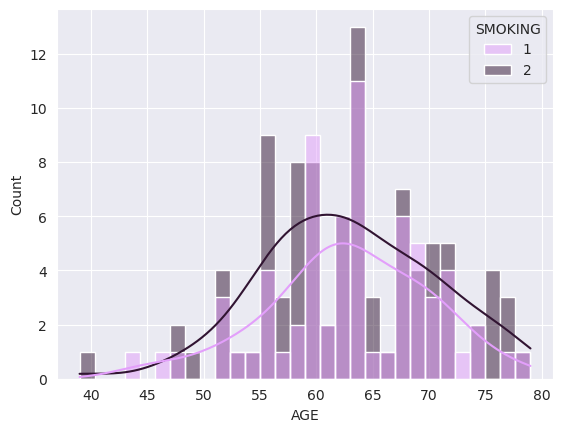

In [14]:
#Age Distribution of Male Individuals by Smoking Status
sns.histplot(data=df[df['GENDER']=="M"], x='AGE', bins= 30, kde=True, hue='SMOKING', palette=["#E39FFb", "#311432"])

# BINNING

In [15]:
#The age will be divided into 7 age categories:
#Below 40 y.o.
#40 - 50 y.o.
#51 - 60 y.o.
#61 - 70 y.o.
#71 - 80 y.o.
#Above 80.
bin_age = [0, 40, 50, 60, 70, 80, 90]
category_age = ['<40s', '40-50', '51-60', '61-70', '71-80','>80s']
df['Age_binned'] = pd.cut(df['AGE'], bins=bin_age, labels=category_age)
df = df.drop(['AGE'], axis = 1)

# Data Pre-processing

In [16]:
#coverting YES  & NO in lung cancer into binary
df=df.replace({'M':0,'F':1})
df = df.replace({'YES':0,'NO':1})
df

,GENDER,SMOKING,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,Age_binned
0,0,1,1,2,1,2,2,2,2,2,2,0,61-70
1,0,2,2,2,2,1,1,1,2,2,2,0,71-80
2,1,1,1,2,1,2,1,2,2,1,2,1,51-60
3,0,2,1,1,1,1,2,1,1,2,2,1,61-70
4,1,1,1,1,1,2,1,2,2,1,1,1,61-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,1,1,2,2,1,1,2,2,2,2,1,0,51-60
305,0,2,1,2,2,2,2,2,2,1,2,0,61-70
306,0,2,1,1,2,2,2,2,1,1,2,0,51-60
307,0,2,1,2,2,1,2,2,2,1,2,0,61-70


**Train-Test Split**

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

X = df.drop(["LUNG_CANCER"], axis=1)
y = df["LUNG_CANCER"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 30)

# Feature Engineering

**One hot Encoding**

In [18]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
X_train.head()
X_test.head()

,GENDER,SMOKING,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,Age_binned_<40s,Age_binned_40-50,Age_binned_51-60,Age_binned_61-70,Age_binned_71-80,Age_binned_>80s
245,0,1,1,2,1,2,1,1,2,1,2,0,0,1,0,0,0
215,1,1,2,2,1,1,1,1,2,1,1,0,0,0,1,0,0
232,0,1,2,2,2,2,2,2,1,2,2,0,0,0,1,0,0
190,1,1,2,2,1,1,1,1,1,1,1,0,0,0,1,0,0
130,1,2,1,2,1,1,1,1,2,2,1,0,0,1,0,0,0


# Data Augmentation

**SMOTE Technique ⚒**

In [19]:
!pip install imbalanced-learn
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

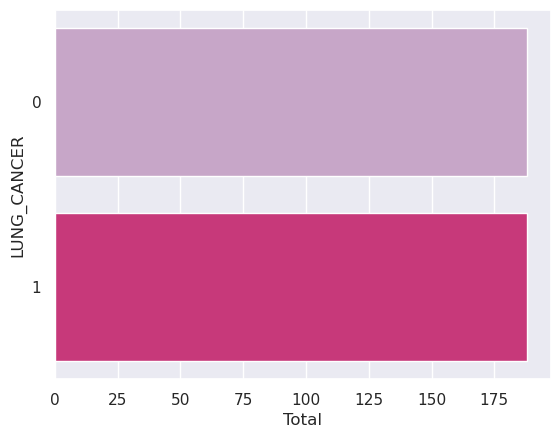

In [20]:
#COUNT REPRESENTATION OF LUNG CANCER AFter oversampling to balance data

sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, data=df, palette="PuRd")
plt.ylabel('LUNG_CANCER')
plt.xlabel('Total')
plt.show()


# Modelling

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler

In [22]:

models = {
    '  Logistic Regression': LogisticRegression(),
    '           Linear SVM': LinearSVC(),
    '        Decision Tree': DecisionTreeClassifier(),
    '        Random Forest': RandomForestClassifier(),
    ' KNeighborsClassifier': KNeighborsClassifier(),
    '   Bagging Classifier': BaggingClassifier()
}

for name, model in models.items():
    model = model.fit(X_train, y_train)
    print(name + " trained")

  Logistic Regression trained
           Linear SVM trained
        Decision Tree trained
        Random Forest trained
 KNeighborsClassifier trained
   Bagging Classifier trained


In [23]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))

  Logistic Regression: 90.32%
           Linear SVM: 87.10%
        Decision Tree: 83.87%
        Random Forest: 86.02%
 KNeighborsClassifier: 86.02%
   Bagging Classifier: 88.17%
